In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.model_selection as model_selection
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score

In [2]:
df = pd.read_csv('bike sharing by day.csv')

In [3]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
df.drop(columns = [ 'casual', 'registered', 'instant','dteday'], axis =1, inplace = True)

In [5]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600


In [6]:
df.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,4504.348837
std,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,1937.211452
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,3152.000000
50%,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,4548.000000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,5956.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,8714.000000


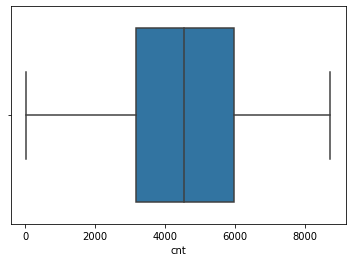

In [7]:
sns.boxplot(df['cnt'])

In [8]:
from scipy.stats import norm

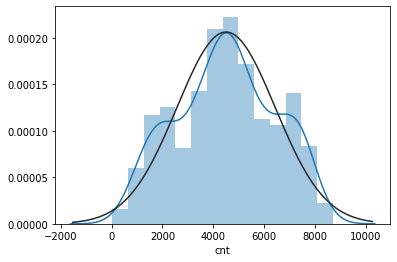

In [9]:
norm.fit(df['cnt'])
sns.distplot(df['cnt'], fit= norm)

In [10]:
df.corr()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
season,1.000000,-0.001844,0.831440,-0.010537,-0.003080,0.012485,0.019211,0.334315,0.342876,0.205445,-0.229046,0.406100
yr,-0.001844,1.000000,-0.001792,0.007954,-0.005461,-0.002013,-0.048727,0.047604,0.046106,-0.110651,-0.011817,0.566710
mnth,0.831440,-0.001792,1.000000,0.019191,0.009509,-0.005901,0.043528,0.220205,0.227459,0.222204,-0.207502,0.279977
holiday,-0.010537,0.007954,0.019191,1.000000,-0.101960,-0.253023,-0.034627,-0.028556,-0.032507,-0.015937,0.006292,-0.068348
weekday,-0.003080,-0.005461,0.009509,-0.101960,1.000000,0.035790,0.031087,-0.000170,-0.007537,-0.052232,0.014282,0.067443
workingday,0.012485,-0.002013,-0.005901,-0.253023,0.035790,1.000000,0.061200,0.052660,0.052182,0.024327,-0.018796,0.061156
weathersit,0.019211,-0.048727,0.043528,-0.034627,0.031087,0.061200,1.000000,-0.120602,-0.121583,0.591045,0.039511,-0.297391
temp,0.334315,0.047604,0.220205,-0.028556,-0.000170,0.052660,-0.120602,1.000000,0.991702,0.126963,-0.157944,0.627494
atemp,0.342876,0.046106,0.227459,-0.032507,-0.007537,0.052182,-0.121583,0.991702,1.000000,0.139988,-0.183643,0.631066
hum,0.205445,-0.110651,0.222204,-0.015937,-0.052232,0.024327,0.591045,0.126963,0.139988,1.000000,-0.248489,-0.100659


#  Categorical Variable Analysis

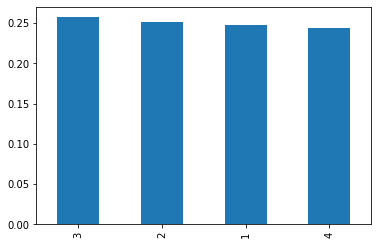

In [11]:
df['season'].value_counts(normalize = True).plot.bar()

In [12]:
df['weekday'].value_counts()

6    105
1    105
0    105
5    104
4    104
3    104
2    104
Name: weekday, dtype: int64

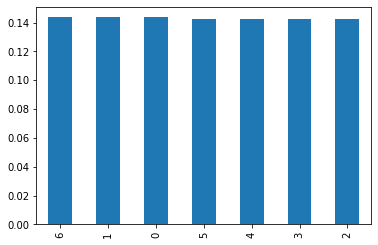

In [13]:
df['weekday'].value_counts(normalize = True).plot.bar()

# Continous Variable univariate analysis

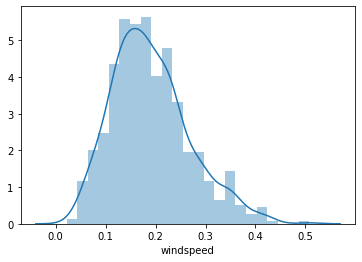

In [14]:
sns.distplot(df['windspeed'])

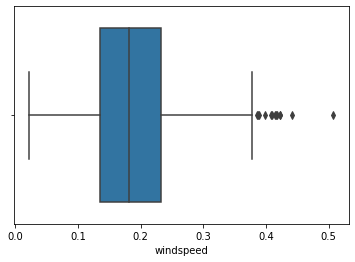

In [15]:
sns.boxplot(df['windspeed'])

In [16]:
df.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,4504.348837
std,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,1937.211452
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,3152.000000
50%,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,4548.000000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,5956.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,8714.000000


In [17]:
import scipy
import statistics as stats

In [18]:
scipy.stats.norm.cdf(0.507463, 0.190486, 0.077498 )

0.9999784435526399

# For illustration of univariate analysis we had done plotting of a categorical and continous variable

# EDA - Bivariate

##### Count and Season    -   Categorical with Continous

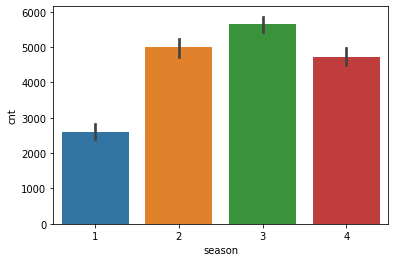

In [19]:
sns.barplot(df['season'], df['cnt'])

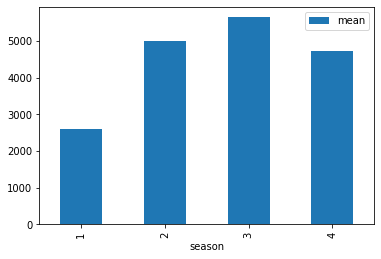

In [20]:
df['cnt'].groupby(df['season']).agg(['mean']).plot.bar()

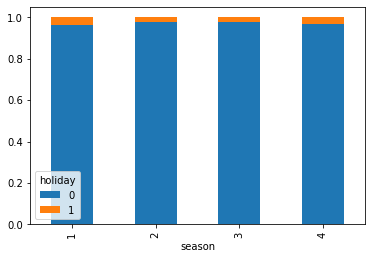

In [21]:
pd.crosstab(df['season'], df['holiday'], normalize = 0).plot.bar(stacked=True)

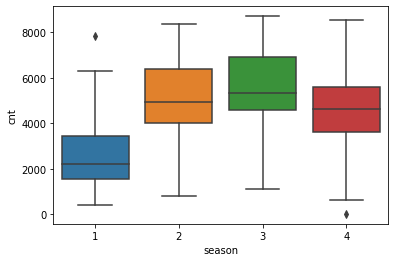

In [22]:
sns.boxplot(df['season'], df['cnt'])

Weekday  - Count

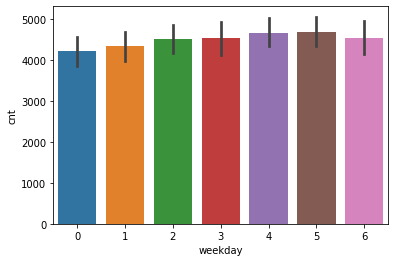

In [23]:
sns.barplot(df['weekday'], df['cnt'])

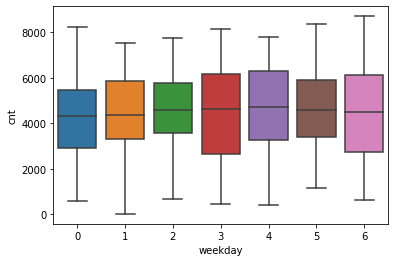

In [24]:
sns.boxplot(df['weekday'], df['cnt'])

In [25]:
df.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,4504.348837
std,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,1937.211452
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,3152.000000
50%,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,4548.000000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,5956.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,8714.000000


# Continous to Continous variable

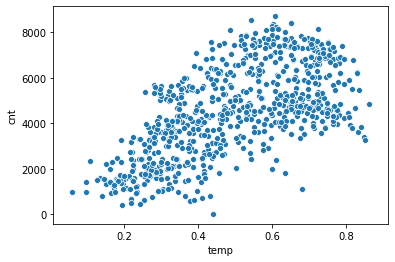

In [26]:
sns.scatterplot(df['temp'], df['cnt'])

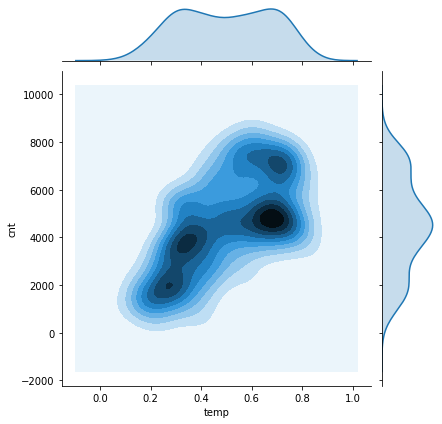

In [27]:
sns.jointplot(df['temp'], df['cnt'], kind='kde', annot_kws = True)

# Categorizing the temperature data for analysis

In [28]:
q1 = df['temp'].quantile(q = 0.25)
q2 = df['temp'].quantile(q = 0.5)
q3 = df['temp'].quantile(q = 0.75)

print('Q1:',q1, '\nQ2:', q2, '\nQ3:', q3)

def temp_cat(tmp):
    if tmp<q1:
        return 1
    elif tmp>=q1 and tmp<q2:
        return 2
    elif tmp>=q2 and tmp<q3:
        return 3
    else :
        return 4
    
df['temp_cat'] = df['temp'].apply(temp_cat)
df.head()

Q1: 0.3370835 
Q2: 0.49833299999999997 
Q3: 0.6554165000000001


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,temp_cat
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985,2
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801,2
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349,1
3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562,1
4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600,1


# Group by Minimum and Maximum values of each category in Temperature

In [29]:
df['temp'].groupby(df['temp_cat']).agg(['min', 'max'])

,min,max
temp_cat,,
1,0.059130,0.336667
2,0.337500,0.495000
3,0.498333,0.655000
4,0.655833,0.861667


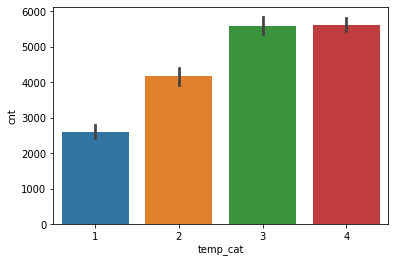

In [30]:
sns.barplot(df['temp_cat'], df['cnt'])

# Windspeed and Count of bikes rented

In [31]:
df.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,temp_cat
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,4504.348837,2.502052
std,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,1937.211452,1.119410
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,22.000000,1.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,3152.000000,1.500000
50%,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,4548.000000,3.000000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,5956.000000,3.500000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,8714.000000,4.000000


# Continous to Continous variable

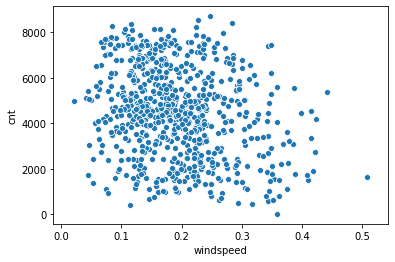

In [32]:
sns.scatterplot(df['windspeed'], df['cnt'])

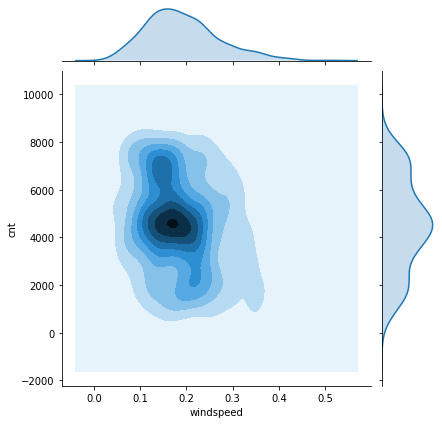

In [33]:
sns.jointplot(df['windspeed'], df['cnt'], kind='kde', annot_kws = True)

# Categorizing the Windspeed data for analysis

In [34]:
q1 = df['windspeed'].quantile(q = 0.25)
q2 = df['windspeed'].quantile(q = 0.5)
q3 = df['windspeed'].quantile(q = 0.75)

print('Q1:',q1, '\nQ2:', q2, '\nQ3:', q3)

def temp_cat(tmp):
    if tmp<q1:
        return 1
    elif tmp>=q1 and tmp<q2:
        return 2
    elif tmp>=q2 and tmp<q3:
        return 3
    else :
        return 4
    
df['wind_cat'] = df['windspeed'].apply(temp_cat)
df.head()

Q1: 0.13495 
Q2: 0.180975 
Q3: 0.2332145


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,temp_cat,wind_cat
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985,2,2
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801,2,4
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349,1,4
3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562,1,2
4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600,1,3


# Group by Minimum and Maximum values of each category in Windspeed

In [35]:
df['windspeed'].groupby(df['wind_cat']).agg(['min', 'max'])

,min,max
wind_cat,,
1,0.022392,0.134342
2,0.134950,0.180967
3,0.180975,0.233208
4,0.233221,0.507463


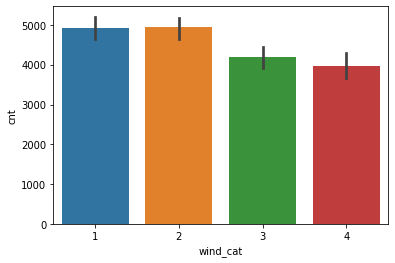

In [36]:
sns.barplot(df['wind_cat'], df['cnt'])

# ------------------------EDA FINISH -----------------------

# ------------Feature Selection --------------

In [37]:
#sns.pairplot(df)

In [38]:
df.corr()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,temp_cat,wind_cat
season,1.000000,-0.001844,0.831440,-0.010537,-0.003080,0.012485,0.019211,0.334315,0.342876,0.205445,-0.229046,0.406100,0.303790,-0.185552
yr,-0.001844,1.000000,-0.001792,0.007954,-0.005461,-0.002013,-0.048727,0.047604,0.046106,-0.110651,-0.011817,0.566710,0.037296,-0.050808
mnth,0.831440,-0.001792,1.000000,0.019191,0.009509,-0.005901,0.043528,0.220205,0.227459,0.222204,-0.207502,0.279977,0.177333,-0.183049
holiday,-0.010537,0.007954,0.019191,1.000000,-0.101960,-0.253023,-0.034627,-0.028556,-0.032507,-0.015937,0.006292,-0.068348,-0.025939,0.018007
weekday,-0.003080,-0.005461,0.009509,-0.101960,1.000000,0.035790,0.031087,-0.000170,-0.007537,-0.052232,0.014282,0.067443,-0.004270,0.004280
workingday,0.012485,-0.002013,-0.005901,-0.253023,0.035790,1.000000,0.061200,0.052660,0.052182,0.024327,-0.018796,0.061156,0.036757,-0.018501
weathersit,0.019211,-0.048727,0.043528,-0.034627,0.031087,0.061200,1.000000,-0.120602,-0.121583,0.591045,0.039511,-0.297391,-0.110254,0.038012
temp,0.334315,0.047604,0.220205,-0.028556,-0.000170,0.052660,-0.120602,1.000000,0.991702,0.126963,-0.157944,0.627494,0.963014,-0.140455
atemp,0.342876,0.046106,0.227459,-0.032507,-0.007537,0.052182,-0.121583,0.991702,1.000000,0.139988,-0.183643,0.631066,0.953404,-0.161848
hum,0.205445,-0.110651,0.222204,-0.015937,-0.052232,0.024327,0.591045,0.126963,0.139988,1.000000,-0.248489,-0.100659,0.139975,-0.230140


# Categorical Variables

In [39]:
list(df.columns)

['season',
 'yr',
 'mnth',
 'holiday',
 'weekday',
 'workingday',
 'weathersit',
 'temp',
 'atemp',
 'hum',
 'windspeed',
 'cnt',
 'temp_cat',
 'wind_cat']

In [40]:
df.drop(columns = ['wind_cat', 'temp_cat'], axis = 1, inplace =True)

# Making Dummies for categorical Variables present in Data

In [41]:
cat_cols = ['season','mnth','weekday','weathersit']

In [42]:
df = pd.get_dummies(df, columns= cat_cols, drop_first = True)

In [43]:
df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
0,0,0,0,0.344167,0.363625,0.805833,0.160446,985,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0,0,0,0.363478,0.353739,0.696087,0.248539,801,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,0.196364,0.189405,0.437273,0.248309,1349,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0.200000,0.212122,0.590435,0.160296,1562,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,1,0.226957,0.229270,0.436957,0.186900,1600,0,0,...,0,0,0,0,1,0,0,0,0,0


In [44]:
df['yr']= df['yr'].map({0:2011, 1:2012})

In [45]:
df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
0,2011,0,0,0.344167,0.363625,0.805833,0.160446,985,0,0,...,0,0,0,0,0,0,0,1,1,0
1,2011,0,0,0.363478,0.353739,0.696087,0.248539,801,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2011,0,1,0.196364,0.189405,0.437273,0.248309,1349,0,0,...,0,0,1,0,0,0,0,0,0,0
3,2011,0,1,0.200000,0.212122,0.590435,0.160296,1562,0,0,...,0,0,0,1,0,0,0,0,0,0
4,2011,0,1,0.226957,0.229270,0.436957,0.186900,1600,0,0,...,0,0,0,0,1,0,0,0,0,0


# Linear Regression - Statistics

In [46]:
import statsmodels.api as sm
from statsmodels.tools import add_constant as add_constant

In [47]:
#df = df.drop(columns=['workingday','atemp','mnth_7','mnth_11','mnth_12','mnth_1','season_2'], axis=1)

In [48]:
df.corr()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
yr,1.000000,0.007954,-0.002013,0.047604,0.046106,-0.110651,-0.011817,0.566710,-0.000793,-0.000805,...,-0.000409,-0.000416,0.003340,-0.000557,-0.000557,-0.000557,-0.000557,-0.004461,-0.003869,-0.073941
holiday,0.007954,1.000000,-0.253023,-0.028556,-0.032507,-0.015937,0.006292,-0.068348,-0.024265,-0.026247,...,0.067917,0.006434,0.279823,-0.046599,-0.046599,-0.023155,-0.023155,-0.070435,-0.018972,-0.029577
workingday,-0.002013,-0.253023,1.000000,0.052660,0.052182,0.024327,-0.018796,0.061156,0.014543,0.016218,...,-0.011145,-0.014867,0.152529,0.268401,0.268401,0.259978,0.259978,-0.602541,0.050099,0.028820
temp,0.047604,-0.028556,0.052660,1.000000,0.991702,0.126963,-0.157944,0.627494,0.155424,0.678471,...,-0.206243,-0.285169,-0.004333,0.019809,0.020574,0.019941,0.000456,-0.029882,-0.097706,-0.058238
atemp,0.046106,-0.032507,0.052182,0.991702,1.000000,0.139988,-0.183643,0.631066,0.163661,0.655956,...,-0.196468,-0.277030,0.000525,0.022465,0.018148,0.020873,-0.008108,-0.030889,-0.094253,-0.064727
hum,-0.110651,-0.015937,0.024327,0.126963,0.139988,1.000000,-0.248489,-0.100659,-0.003854,0.023101,...,-0.006340,0.081590,0.027861,0.039875,0.050000,-0.052636,-0.040456,-0.023980,0.491834,0.267011
windspeed,-0.011817,0.006292,-0.018796,-0.157944,-0.183643,-0.248489,1.000000,-0.234545,0.097513,-0.139732,...,-0.025811,-0.054550,0.001081,0.007042,-0.014461,0.005873,-0.021548,0.032266,-0.037408,0.117362
cnt,0.566710,-0.068348,0.061156,0.627494,0.631066,-0.100659,-0.234545,1.000000,0.146197,0.346487,...,-0.039723,-0.173065,-0.035166,0.001328,0.009297,0.034273,0.039118,0.009773,-0.172879,-0.239958
season_2,-0.000793,-0.024265,0.014543,0.155424,0.163661,-0.003854,0.097513,0.146197,1.000000,-0.341267,...,-0.173432,-0.176562,0.005127,-0.001605,0.007419,-0.001605,-0.001605,-0.003861,0.038836,-0.043136
season_3,-0.000805,-0.026247,0.016218,0.678471,0.655956,0.023101,-0.139732,0.346487,-0.341267,1.000000,...,-0.175952,-0.179127,-0.008961,0.002267,0.002267,0.011227,0.002267,-0.000037,-0.102723,-0.026247


In [49]:
y = df['cnt']
X = df.drop(['cnt'], axis =1)

In [50]:
Xc = add_constant(X)

C:\Users\arul\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [51]:
model=sm.OLS(y, Xc)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     140.3
Date:                Fri, 06 Dec 2019   Prob (F-statistic):          8.67e-266
Time:                        18:19:57   Log-Likelihood:                -5880.2
No. Observations:                 731   AIC:                         1.182e+04
Df Residuals:                     702   BIC:                         1.195e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         -4.06e+06   1.17e+05    -34.665      0.000   -4.29e+06   -3.83e+06
yr            2019.7354     58.220     34.691      0.000    1905.429    2134.042
holiday       -258.8454    160.940     -1.608      0.108    -574.827      57.136
workingday     330.8518     66.825      4.951      0.000     199.651     462.053
temp          2855.0107   1398.156      2.042      0.042     109.942    5600.079
atemp         1786.1574   1462.120      1.222      0.222   -1084.494    4656.808
hum          -1535.4684    292.448     -5.250      0.000   -2109.646    -961.290
windspeed    -2823.2967    414.552     -6.810      0.000   -3637.207   -2009.386
season_2       884.7108    179.492      4.929      0.000     532.305    1237.117
season_3       832.7022    213.129      3.907      0.000     414.255    1251.150
season_4      1575.3506    181.001      8.704      0.000    1219.983    1930.718
mnth_2         131.0251    143.776      0.911      0.362    -151.258     413.308
mnth_3         542.8277    165.433      3.281      0.001     218.025     867.630
mnth_4         451.1656    247.567      1.822      0.069     -34.895     937.226
mnth_5         735.5055    267.628      2.748      0.006     210.059    1260.952
mnth_6         515.4048    282.411      1.825      0.068     -39.066    1069.876
mnth_7          30.7966    313.821      0.098      0.922    -585.343     646.937
mnth_8         444.9490    303.165      1.468      0.143    -150.270    1040.168
mnth_9        1004.1728    265.123      3.788      0.000     483.644    1524.701
mnth_10        519.6743    241.554      2.151      0.032      45.420     993.928
mnth_11       -116.6933    230.776     -0.506      0.613    -569.788     336.401
mnth_12        -89.5915    182.214     -0.492      0.623    -447.342     268.159
weekday_1     -118.7980     71.469     -1.662      0.097    -259.116      21.520
weekday_2      -21.3242     77.324     -0.276      0.783    -173.138     130.490
weekday_3       50.5056     77.670      0.650      0.516    -101.988     202.999
weekday_4       55.4911     77.017      0.721      0.471     -95.721     206.703
weekday_5      106.1319     77.308      1.373      0.170     -45.652     257.915
weekday_6      440.4588    106.562      4.133      0.000     231.240     649.678
weathersit_2  -462.5381     77.087     -6.000      0.000    -613.887    -311.190
weathersit_3 -1965.0865    197.052     -9.972      0.000   -2351.968   -1578.205
==============================================================================
Omnibus:                      125.281   Durbin-Watson:                   1.198
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              347.309
Skew:                          -0.860   Prob(JB):                     3.83e-76
Kurtosis:                       5.906   Cond. No.                     1.00e+16
===============

# For Yr variable . There is 0.000 % of probabilityb that the coefficient is 2019.73. Theory =  0.0000 is the probability of getting |coefficient of yr| >= 2019, when null hypothesis is true

In [52]:
df.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,...,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2011.500684,0.028728,0.683995,0.495385,0.474354,0.627894,0.190486,4504.348837,0.251710,0.257182,...,0.082079,0.084815,0.143639,0.142271,0.142271,0.142271,0.142271,0.143639,0.337893,0.028728
std,0.500342,0.167155,0.465233,0.183051,0.162961,0.142429,0.077498,1937.211452,0.434293,0.437380,...,0.274674,0.278797,0.350963,0.349567,0.349567,0.349567,0.349567,0.350963,0.473316,0.167155
min,2011.000000,0.000000,0.000000,0.059130,0.079070,0.000000,0.022392,22.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2011.000000,0.000000,0.000000,0.337083,0.337842,0.520000,0.134950,3152.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2012.000000,0.000000,1.000000,0.498333,0.486733,0.626667,0.180975,4548.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2012.000000,0.000000,1.000000,0.655417,0.608602,0.730209,0.233214,5956.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,2012.000000,1.000000,1.000000,0.861667,0.840896,0.972500,0.507463,8714.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# R square =  84.8% of variation in cnt is explained by the independent variables

# Finding Multicollinearity for Feature Selection

In [53]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [54]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

C:\Users\arul\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [55]:
vif

,VIF Factor,features
0,68.587873,yr
1,inf,holiday
2,inf,workingday
3,670.259284,temp
4,663.890463,atemp
5,42.731856,hum
6,8.954194,windspeed
7,10.017000,season_2
8,14.428935,season_3
9,9.853519,season_4


 #    ----------------- VIF value Finish - ------------------

# Polynomial Regression

In [56]:
import statsmodels.api as sm
from statsmodels.tools import add_constant as add_constant

In [57]:
#df = df.drop(columns=['workingday','atemp','mnth_7','mnth_11','mnth_12','season_2'], axis=1)

In [58]:
y = df['cnt']
X = df.drop(['cnt'], axis =1)
X = X.drop(columns=['workingday','atemp','mnth_7','mnth_11','mnth_12','season_2'], axis=1)

X['temp2']= np.square(X['temp'])
X= X.drop(['temp'], axis=1)
Xc = sm.add_constant(X)

C:\Users\arul\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [59]:
from sklearn.preprocessing import PolynomialFeatures

In [60]:
model=sm.OLS(y, Xc)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     143.8
Date:                Fri, 06 Dec 2019   Prob (F-statistic):          1.71e-248
Time:                        18:20:05   Log-Likelihood:                -5934.9
No. Observations:                 731   AIC:                         1.192e+04
Df Residuals:                     707   BIC:                         1.203e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -4.124e+06   1.25e+05    -33.091      0.000   -4.37e+06   -3.88e+06
yr            2051.8063     61.944     33.123      0.000    1930.189    2173.423
holiday       -635.6182    192.201     -3.307      0.001   -1012.971    -258.266
hum          -1216.2305    305.557     -3.980      0.000   -1816.138    -616.323
windspeed    -2924.5924    433.766     -6.742      0.000   -3776.215   -2072.969
season_3       665.6496    164.692      4.042      0.000     342.306     988.993
season_4      1549.0879    116.788     13.264      0.000    1319.796    1778.380
mnth_2         135.5831    138.839      0.977      0.329    -137.004     408.170
mnth_3         976.0721    136.826      7.134      0.000     707.439    1244.705
mnth_4        1537.7422    142.657     10.779      0.000    1257.661    1817.823
mnth_5        1770.9798    158.177     11.196      0.000    1460.427    2081.533
mnth_6        1238.7596    150.990      8.204      0.000     942.316    1535.203
mnth_8         628.6733    139.621      4.503      0.000     354.552     902.795
mnth_9        1257.1506    130.850      9.608      0.000    1000.249    1514.052
mnth_10        721.5869    134.468      5.366      0.000     457.583     985.591
weekday_1      233.5597    117.464      1.988      0.047       2.939     464.180
weekday_2      320.5019    114.769      2.793      0.005      95.173     545.831
weekday_3      394.1968    115.086      3.425      0.001     168.245     620.149
weekday_4      397.3693    115.000      3.455      0.001     171.588     623.151
weekday_5      439.7922    114.993      3.825      0.000     214.024     665.560
weekday_6      440.7285    114.353      3.854      0.000     216.217     665.240
weathersit_2  -489.6377     82.134     -5.961      0.000    -650.893    -328.382
weathersit_3 -2019.0266    210.449     -9.594      0.000   -2432.207   -1605.846
temp2         4310.2151    338.625     12.729      0.000    3645.384    4975.046
==============================================================================
Omnibus:                      102.025   Durbin-Watson:                   1.115
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              262.819
Skew:                          -0.729   Prob(JB):                     8.50e-58
Kurtosis:                       5.550   Cond. No.                     8.21e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.21e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

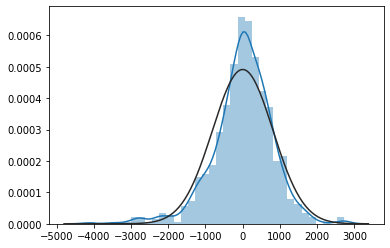

In [61]:
from scipy.stats import norm
norm.fit(result.resid)

sns.distplot(result.resid,  fit = norm)

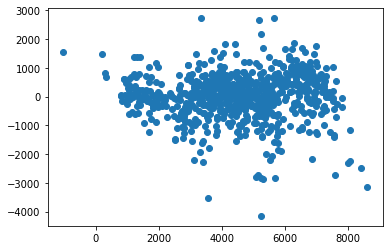

In [62]:
# Checking for Homoscadasticity

y_pred = result.predict(Xc)
plt.scatter( x = y_pred, y= result.resid)

# Testing of Homoscadasticity

In [63]:
import statsmodels.stats.api as sms

name =['F-statistics','p-value']
test = sms.het_goldfeldquandt(y = result.resid, x = Xc)
test

(2.335834536254773, 5.246885048557343e-15, 'increasing')

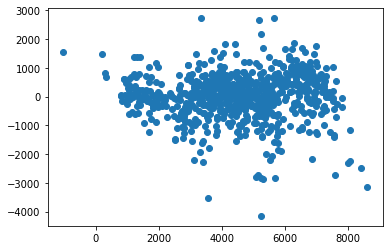

In [64]:
y_pred = result.predict(Xc)
plt.scatter( x = y_pred, y= result.resid)

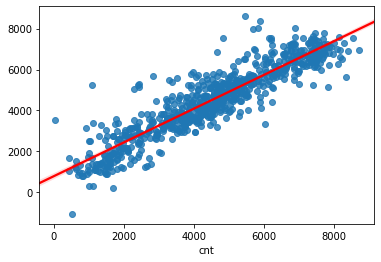

In [65]:
sns.regplot(x = y, y = y_pred, line_kws = {'color':'r'})

# Linear Regression Model

In [66]:
from sklearn.linear_model import LinearRegression

In [67]:
df = pd.read_csv('bike sharing by day.csv')

In [68]:
df.drop(columns = ['casual', 'registered','instant','dteday','atemp','workingday'], axis =1, inplace =True)

In [69]:
df.head()

,season,yr,mnth,holiday,weekday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,6,2,0.344167,0.805833,0.160446,985
1,1,0,1,0,0,2,0.363478,0.696087,0.248539,801
2,1,0,1,0,1,1,0.196364,0.437273,0.248309,1349
3,1,0,1,0,2,1,0.200000,0.590435,0.160296,1562
4,1,0,1,0,3,1,0.226957,0.436957,0.186900,1600


In [70]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [71]:
cat_cols = ['season','mnth','weekday','weathersit']
df = pd.get_dummies(df, columns= cat_cols, drop_first = True)
df['yr'] = df['yr'].map({0:2011,1:2012})

In [72]:
df.head()

,yr,holiday,temp,hum,windspeed,cnt,season_2,season_3,season_4,mnth_2,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
0,2011,0,0.344167,0.805833,0.160446,985,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,2011,0,0.363478,0.696087,0.248539,801,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2011,0,0.196364,0.437273,0.248309,1349,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,2011,0,0.200000,0.590435,0.160296,1562,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,2011,0,0.226957,0.436957,0.186900,1600,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [73]:
X = df.drop('cnt', axis=1)
y = df['cnt']

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=45)
print("Shape of the X_train: ", X_train.shape,'\n' ,'Shape of X_Test',X_test.shape)

Shape of the X_train:  (511, 27) 
 Shape of X_Test (220, 27)


In [75]:
lr  = LinearRegression()
lr.fit(X_train, y_train)
y_train_pred = lr.predict(X_train)

In [76]:
print('train data score:',r2_score(y_train, y_train_pred))

train data score: 0.8524668598544376


In [77]:
y_test_pred = lr.predict(X_test)

In [78]:
print('test data score:',r2_score( y_test, y_test_pred))

test data score: 0.8222906145367354


In [79]:
lr.coef_

array([ 2017.30044329,  -652.01482255,  3992.07268894, -1283.51408678,
       -1860.90416064,   913.32450918,   887.66020237,  1587.9901381 ,
         151.14759167,   439.32427782,   520.23428934,   951.46212074,
         562.37339336,   193.85842905,   595.22527153,  1113.00288424,
         676.08077134,     7.933087  ,   -96.91060415,   380.30840041,
         346.3541822 ,   512.78113388,   566.99265713,   486.45077363,
         515.37026361,  -580.85042562, -2091.44698498])

In [80]:
df.head()

,yr,holiday,temp,hum,windspeed,cnt,season_2,season_3,season_4,mnth_2,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
0,2011,0,0.344167,0.805833,0.160446,985,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,2011,0,0.363478,0.696087,0.248539,801,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2011,0,0.196364,0.437273,0.248309,1349,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,2011,0,0.200000,0.590435,0.160296,1562,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,2011,0,0.226957,0.436957,0.186900,1600,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


# Feature Selection using RFE

In [81]:
from sklearn.feature_selection import RFE

In [82]:
model = LinearRegression()
rfe = RFE(model,10)

In [83]:
X_rfe = rfe.fit_transform(X_train, y_train)
model.fit(X_rfe, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [84]:
rfe.support_

array([ True,  True,  True,  True,  True,  True,  True,  True, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False,  True])

In [85]:
rfe.ranking_

array([ 1,  1,  1,  1,  1,  1,  1,  1, 16,  8,  7,  5,  6, 15,  4,  1,  2,
       18, 17, 13, 14, 11,  9, 12, 10,  3,  1])

In [86]:
pd.DataFrame([X_train.columns, rfe.ranking_]).T

,0,1
0,yr,1
1,holiday,1
2,temp,1
3,hum,1
4,windspeed,1
5,season_2,1
6,season_3,1
7,season_4,1
8,mnth_2,16
9,mnth_3,8


# Loop for finding out the best number of variables to predict Y variable 

In [87]:
no_of_cols = len(X_train.columns)
score_list = []

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=45)

for n in range(no_of_cols):
    mode = LinearRegression()
    rfe = RFE(model, n+1)
    X_train_rfe = rfe.fit_transform(X_train, y_train)
    model.fit(X_train_rfe, y_train)
    
    X_test_rfe = rfe.transform(X_test)
    score= model.score(X_test_rfe, y_test)
    
    score_list.append(score)

In [88]:
score_list

[0.354662860375758,
 0.38983486465993833,
 0.7234220128327391,
 0.7426629582561721,
 0.7646108162618921,
 0.7885860794639209,
 0.7964049068811594,
 0.8242762997162293,
 0.8246643220938773,
 0.8290144567417321,
 0.8294825450258453,
 0.8240466781695244,
 0.8244104986245021,
 0.8213621965381865,
 0.8215473438467491,
 0.8212972209564914,
 0.8282240168960954,
 0.8247248693436622,
 0.8259131074755607,
 0.8245524057171346,
 0.8266248337662041,
 0.8226258138341905,
 0.8232107796254889,
 0.8228247078618365,
 0.82290869331159,
 0.8223148039572598,
 0.8222906145367354]

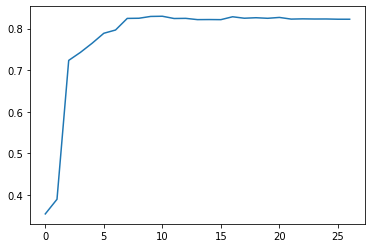

In [89]:
plt.plot(range(no_of_cols), score_list)

# We Found that R^2 is maximum when number of columns are 10. Hence, we will run RFE with 10 variables to indentify the best 10 

In [90]:
from sklearn.feature_selection import RFE

In [91]:
model = LinearRegression()
rfe = RFE(model,10)

In [92]:
X_rfe = rfe.fit_transform(X_train, y_train)
model.fit(X_rfe, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [93]:
rfe.support_

array([ True,  True,  True,  True,  True,  True,  True,  True, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False,  True])

In [94]:
rfe.ranking_

array([ 1,  1,  1,  1,  1,  1,  1,  1, 16,  8,  7,  5,  6, 15,  4,  1,  2,
       18, 17, 13, 14, 11,  9, 12, 10,  3,  1])

In [95]:
sel= pd.DataFrame([X_train.columns, rfe.ranking_]).T
sel.columns = ['cols', 'select']
sel = sel[sel['select']==1]
sel

,cols,select
0,yr,1
1,holiday,1
2,temp,1
3,hum,1
4,windspeed,1
5,season_2,1
6,season_3,1
7,season_4,1
15,mnth_9,1
26,weathersit_3,1


In [96]:
selected_columns = sel['cols'].tolist()
selected_columns

['yr',
 'holiday',
 'temp',
 'hum',
 'windspeed',
 'season_2',
 'season_3',
 'season_4',
 'mnth_9',
 'weathersit_3']

In [97]:
X_train = X_train.loc[:,selected_columns]
X_test = X_test.loc[:,selected_columns]

In [98]:
lr  = LinearRegression()
lr.fit(X_train.loc[:,selected_columns], y_train)
y_train_pred = lr.predict(X_train.loc[:,selected_columns])

In [99]:
print('train data score:',r2_score(y_train, y_train_pred))

train data score: 0.8221346807719118


In [100]:
y_test_pred = lr.predict(X_test.loc[:,selected_columns])

In [101]:
print('test data score:',r2_score( y_test, y_test_pred))

test data score: 0.8290144567417321


In [102]:
cf = pd.DataFrame([X_train.loc[:,selected_columns].columns, lr.coef_]).T
cf.columns = ['cols', 'coef_']
cf

,cols,coef_
0,yr,1987.08
1,holiday,-662.357
2,temp,5401.37
3,hum,-2408.35
4,windspeed,-2177.87
5,season_2,1148.57
6,season_3,690.828
7,season_4,1614.48
8,mnth_9,790.226
9,weathersit_3,-1538.36


# Regularization -  Lasso /Ridge / Elastic Net

In [103]:
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV, ElasticNet, ElasticNetCV

In [104]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [105]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures()
Xp  = poly.fit_transform(X)

In [106]:
Xp

array([[1.000e+00, 2.011e+03, 0.000e+00, ..., 1.000e+00, 0.000e+00,
        0.000e+00],
       [1.000e+00, 2.011e+03, 0.000e+00, ..., 1.000e+00, 0.000e+00,
        0.000e+00],
       [1.000e+00, 2.011e+03, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       ...,
       [1.000e+00, 2.012e+03, 0.000e+00, ..., 1.000e+00, 0.000e+00,
        0.000e+00],
       [1.000e+00, 2.012e+03, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [1.000e+00, 2.012e+03, 0.000e+00, ..., 1.000e+00, 0.000e+00,
        0.000e+00]])

In [107]:
# Since Xp is values of a polynomial array . therefore converting it to Data Frame

In [108]:
Xp = pd.DataFrame(Xp, columns = poly.get_feature_names(X.columns))

In [109]:
Xp.head()

,1,yr,holiday,temp,hum,windspeed,season_2,season_3,season_4,mnth_2,...,weekday_5^2,weekday_5 weekday_6,weekday_5 weathersit_2,weekday_5 weathersit_3,weekday_6^2,weekday_6 weathersit_2,weekday_6 weathersit_3,weathersit_2^2,weathersit_2 weathersit_3,weathersit_3^2
0,1.0,2011.0,0.0,0.344167,0.805833,0.160446,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
1,1.0,2011.0,0.0,0.363478,0.696087,0.248539,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,2011.0,0.0,0.196364,0.437273,0.248309,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,2011.0,0.0,0.200000,0.590435,0.160296,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,2011.0,0.0,0.226957,0.436957,0.186900,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [110]:
Xp.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 406 columns):
1                            float64
yr                           float64
holiday                      float64
temp                         float64
hum                          float64
windspeed                    float64
season_2                     float64
season_3                     float64
season_4                     float64
mnth_2                       float64
mnth_3                       float64
mnth_4                       float64
mnth_5                       float64
mnth_6                       float64
mnth_7                       float64
mnth_8                       float64
mnth_9                       float64
mnth_10                      float64
mnth_11                      float64
mnth_12                      float64
weekday_1                    float64
weekday_2                    float64
weekday_3                    float64
weekday_4                    float64
weekda

# We Found that R^2 is maximum when number of columns are 50. Hence, we will run RFE with 50 variables to indentify the best 50 

In [111]:
from sklearn.feature_selection import RFE

In [112]:
model = LinearRegression()
rfe = RFE(model,50)

In [113]:
Xp.head()

,1,yr,holiday,temp,hum,windspeed,season_2,season_3,season_4,mnth_2,...,weekday_5^2,weekday_5 weekday_6,weekday_5 weathersit_2,weekday_5 weathersit_3,weekday_6^2,weekday_6 weathersit_2,weekday_6 weathersit_3,weathersit_2^2,weathersit_2 weathersit_3,weathersit_3^2
0,1.0,2011.0,0.0,0.344167,0.805833,0.160446,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
1,1.0,2011.0,0.0,0.363478,0.696087,0.248539,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,2011.0,0.0,0.196364,0.437273,0.248309,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,2011.0,0.0,0.200000,0.590435,0.160296,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,2011.0,0.0,0.226957,0.436957,0.186900,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [114]:
X_rfe = rfe.fit_transform(X_train, y_train)
model.fit(X_rfe, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [115]:
rfe.support_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [116]:
rfe.ranking_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [117]:
sel= pd.DataFrame([X_train.columns, rfe.ranking_]).T
sel.columns = ['cols', 'select']
sel = sel[sel['select']==1]
sel

,cols,select
0,yr,1
1,holiday,1
2,temp,1
3,hum,1
4,windspeed,1
5,season_2,1
6,season_3,1
7,season_4,1
8,mnth_9,1
9,weathersit_3,1


In [118]:
selected_columns = sel['cols'].tolist()
selected_columns

['yr',
 'holiday',
 'temp',
 'hum',
 'windspeed',
 'season_2',
 'season_3',
 'season_4',
 'mnth_9',
 'weathersit_3']

In [119]:
X_train = X_train.loc[:,selected_columns]
X_test = X_test.loc[:,selected_columns]

In [120]:
X_test.head()

,yr,holiday,temp,hum,windspeed,season_2,season_3,season_4,mnth_9,weathersit_3
499,2012,0,0.573333,0.789583,0.212692,1,0,0,0,0
690,2012,0,0.353333,0.613750,0.103246,0,0,1,0,0
549,2012,0,0.780833,0.492083,0.126237,0,1,0,0,0
657,2012,0,0.563333,0.815000,0.134954,0,0,1,0,0
384,2012,0,0.217500,0.450000,0.202750,0,0,0,0,0


In [121]:
lr  = LinearRegression()
lr.fit(X_train.loc[:,selected_columns], y_train)
y_train_pred = lr.predict(X_train.loc[:,selected_columns])

In [122]:
print('train data score:',r2_score(y_train, y_train_pred))

train data score: 0.8221346807719118


In [123]:
y_test_pred = lr.predict(X_test.loc[:,selected_columns])

In [124]:
print('test data score:',r2_score( y_test, y_test_pred))

test data score: 0.8290144567417321


# Ridge Regularization

In [134]:
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV, ElasticNet, ElasticNetCV

In [135]:
df = pd.read_csv('bike sharing by day.csv')

In [136]:
df.drop(columns = ['casual', 'registered','instant','dteday','atemp','workingday'], axis =1, inplace =True)

In [137]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [138]:
X_train = X_train.loc[:,selected_columns]
X_test = X_test.loc[:,selected_columns]

In [139]:
X_train.head()

,yr,holiday,temp,hum,windspeed,season_2,season_3,season_4,mnth_9,weathersit_3
204,2011,0,0.830000,0.550833,0.169171,0,1,0,0,0
625,2012,0,0.580833,0.734583,0.151742,0,1,0,1,0
284,2011,0,0.543333,0.906250,0.248150,0,0,1,0,1
644,2012,0,0.554167,0.664167,0.268025,0,0,1,0,0
262,2011,0,0.561667,0.881250,0.134954,0,1,0,1,0


In [140]:
ridge = Ridge(alpha =0.5)
ridge.fit(X_train, y_train)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [141]:
pd.DataFrame(ridge.coef_, X_train.columns, columns =['coef_'])

,coef_
yr,1988.303559
holiday,-638.771520
temp,5009.394277
hum,-2194.561085
windspeed,-1821.320462
season_2,1221.085035
season_3,847.474358
season_4,1643.343370
mnth_9,763.402795
weathersit_3,-1552.250382


In [142]:
n_alphas = 100
alphas = np.logspace(-1,1)

ridge_cv = RidgeCV(alphas , store_cv_values =True)
ridge_cv.fit(Xp,y)

ridge_cv.alpha_

0.49417133613238345

In [143]:
np.linspace(-2,0,10)

array([-2.        , -1.77777778, -1.55555556, -1.33333333, -1.11111111,
       -0.88888889, -0.66666667, -0.44444444, -0.22222222,  0.        ])

In [144]:
np.logspace(-2,0,10)

array([0.01      , 0.01668101, 0.02782559, 0.04641589, 0.07742637,
       0.12915497, 0.21544347, 0.35938137, 0.59948425, 1.        ])

In [145]:
np.logspace(-2,0,5)

array([0.01      , 0.03162278, 0.1       , 0.31622777, 1.        ])

In [146]:
ridge = Ridge(alpha = 0.49417133613238345)
ridge.fit(X_train, y_train)


y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)

print(r2_score(y_train, y_train_pred))
print(r2_score(y_test, y_test_pred))

0.8214136899742136
0.8242212023996972
